# **Tobit: a mixed-distribution approach**

Tobin (1958) pioneered a solution to estimating given censored or truncated dependant variables that relied on an asymptotically Normal disturbance. Econometricians and statisticians have since developed alterior approaches that allow a disturbance's asymptotic distribution to take more flexible forms (for a survey, see Amemiya (1984); for a more recent application, see Barros, Galea and Leiva (2016)). This program outlines a novel framework for censored regressions where the disturbance's distribution may be a mixture of multiple types; Normal and Exponential are used here. 

There are two motivationing use cases. First, in situations where the disturbance's distribution is truly a mixture. Second, as a tool whereby the relative likelihood of two potential source distributions' may be examined: this would be found in the resulting mixture ratio parameter, gamma.



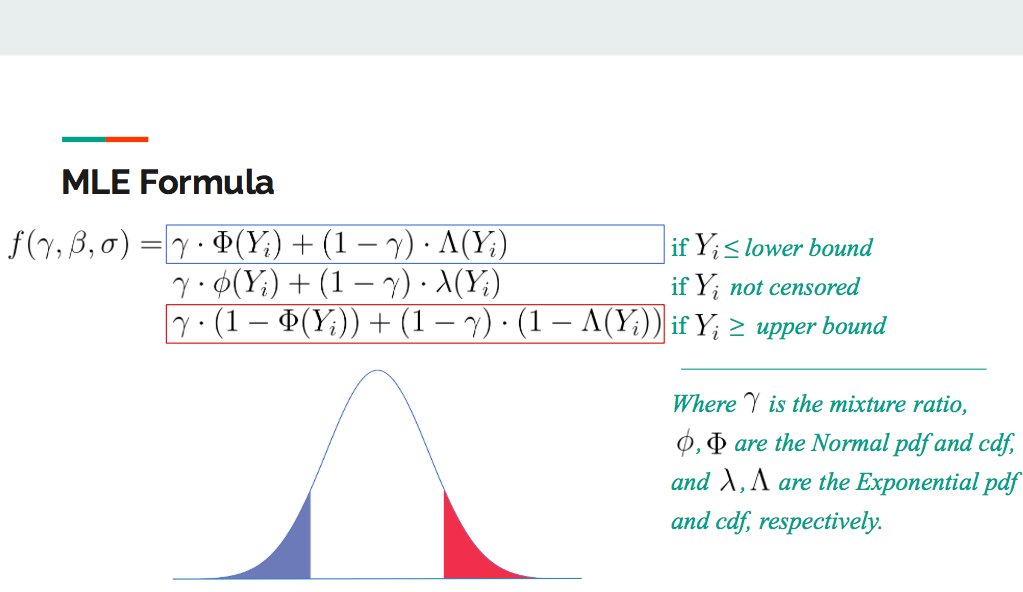

In [ ]:
# import necessary packages
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

In [ ]:
def mixture_llf(params, y, x, lb, ub):
  # unpack parameters
  beta, sigma, gamma = params
  
  # indices for lower bounded, middle, upper bounded obs
  i_lb = (y <= lb)
  i_ub = (y >= ub)
  i_m = np.logical_not(i_lb) & np.logical_not(i_ub)

  # generate E[y] vector
  xb = np.dot(x, beta)

  # calculate like_norm
  like_norm = np.zeros_like(y)
  like_norm[i_lb] = norm.cdf((lb-xb[i_lb]) / sigma)
  like_norm[i_m] = norm.pdf((y[i_m]-xb[i_m]) / sigma)
  like_norm[i_ub] = 1 - norm.cdf((ub-xb[i_ub]) / sigma)

  # calculate like_exp
  like_exp = np.zeros_like(y)
  like_exp[i_lb] = 1 - np.exp((-1/xb[i_lb]) * lb)
  like_exp[i_m] = (1/xb[i_m])*np.exp((-1/xb[i_m]) * y[i_m])
  like_exp[i_ub] = np.exp((-1/xb[i_ub]) * ub)
  
  # calculate like_mix
  like_mix = gamma*like_norm + (1-gamma)*like_exp

  # log and sum like_mix for final loglikelihood value
  loglike_mix = np.sum(np.log(like_mix))
  return -loglike_mix

In [ ]:
# user supplies y, x, lower_bound, upper_bound
# generate intial values ('guesses') and define parameters
beta_guess = .5
sigma_guess = .5
gamma_guess = .5

guesses = [beta_guess, sigma_guess, gamma_guess]
bounds = [(0,np.inf), (0,np.inf), (0,1)]
args = y, x, lower_bound, upper_bound 
method = 'SLSQP'

result = minimize(mixture_llf, guesses, args, method, bounds=bounds)
result

### Resources I consulted:
Great example of Normal tobit using scipy and statsmodels approaches
>http://web.pdx.edu/~crkl/ceR/Python/example8_3.py

Another statsmodels approach, more helpful
>https://rlhick.people.wm.edu/posts/estimating-custom-mle.html

Good example for a data generating process
>https://docs.pymc.io/en/v3/pymc-examples/examples/survival_analysis/censored_data.html

Complete statsmodels approach for Normal tobit
> https://github.com/gbisschoff/statsmodels_tobit/blob/main/src/statsmodels_tobit/tobit.py